# **Predicting Loan Approvals: Machine Learning Insights**


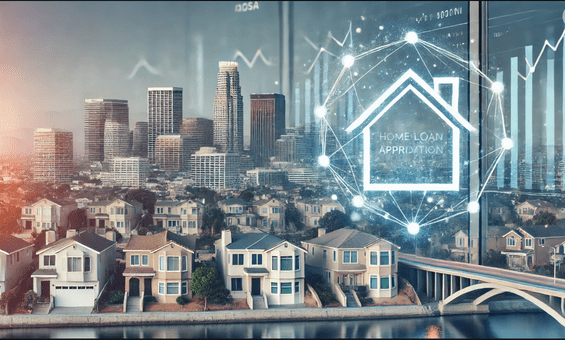




### **Introduction**
Home loan approval is vital for both financial institutions and applicants. Accurate decisions rely on applicant data such as income, credit history, property area, and employment details. This project leverages machine learning to predict loan approval outcomes, ensuring efficient, reliable, and fair decision-making.

### **Objective:**
* The goal of this Project is to evaluate and compare the accuracy of different machine learning approaches in predicting home loan approval. The chosen models include Logistic Regression, Random Forests, Decision Tree, Gradient Boosting Machines (GBM) ,Navie Bayes(NB) and Support Vector Machines (SVM).
*
This comparison will help determine the most effective approach for predicting loan approval based on various borrower characteristics and loan data.



# **Initial Step EDA (Exploratory Data Analysis)**


# Step 1 : Data collection
* The dataset used for this project was obtained from Kaggle.
* This dataset contains detailed information about loan applicants, including financial and personal details, which will be used to predict loan approval outcomes.

# Step 2: Data Loading

In [ ]:
# import required libraries
# Core libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load dataset
Loan = pd.read_csv("https://raw.githubusercontent.com/ParamesManthiramoorthi26/Loan-Approval/refs/heads/main/Loan%20Approval%20Dataset.csv")
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,LP002606,Female,No,0,Graduate,No,3159,0.0,100.0,360.0,1.0,Semiurban,Y
949,LP002615,Male,Yes,2,Graduate,No,4865,5625.0,208.0,360.0,1.0,Semiurban,Y
950,LP002618,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural,N
951,LP002619,Male,Yes,0,Not Graduate,No,3814,1484.0,124.0,300.0,1.0,Semiurban,Y


# Dataset Description

1. **Loan_ID :** A unique code for each loan application.
2. **Gender**   :	 Whether the applicant is male or female.
3. **Married**  :	 Indicates if the applicant is married or single.
4. **Dependents** :	 Number of people financially dependent on the applicant (e.g., 0, 1, 2, or 3+).
5. **Education**	: Shows if the applicant is a graduate or not.
6. **Self_Employed**	: Whether the applicant runs their own business or works for someone else.
7. **ApplicantIncome**	: How much money the main applicant earns every month.
8. **CoapplicantIncome**	: How much money the co-applicant (if any) earns each month.
9. **LoanAmount**	: The loan amount requested (in thousands).
10. **Loan_Amount_Term**:	 How long the loan will last (in months, e.g., 360 months = 30 years).
11. **Credit_History**:	 Indicates if the applicant has a good credit record (1.0 = good, 0.0 = poor).
12. **Property_Area**:	 The type of area where the applicant lives (Urban, Semiurban, or Rural).
13. **Loan_Status**	 :Whether the loan was approved (Y) or rejected (N).


# Initial Inspection

In [ ]:
# View the first few rows
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# View the Last few rows
Loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
948,LP002606,Female,No,0,Graduate,No,3159,0.0,100.0,360.0,1.0,Semiurban,Y
949,LP002615,Male,Yes,2,Graduate,No,4865,5625.0,208.0,360.0,1.0,Semiurban,Y
950,LP002618,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural,N
951,LP002619,Male,Yes,0,Not Graduate,No,3814,1484.0,124.0,300.0,1.0,Semiurban,Y
952,LP002622,Male,Yes,2,Graduate,No,3510,4414.0,243.0,360.0,1.0,Rural,Y


In [ ]:
# Check dataset dimensions
print(f"Dataset contain {Loan.shape[0]}  Rows and {Loan.shape[1]} Columns ")

Dataset contain 953  Rows and 13 Columns 


In [ ]:
# View columns Names
print("Columns names \n ")
Loan.columns

Columns names 
 


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Step 3: Understand the Dataset


In [ ]:
# identify the missing values
missing = Loan.isnull().sum().sort_values(ascending=False)
percent = (Loan.isnull().sum().sort_values(ascending=False)/Loan.isnull().count().sort_values(ascending=False)).round(3)
data = pd.concat([missing , percent] ,axis = 1,keys =['Missing','Percent'])
data

,Missing,Percent
Credit_History,81,0.085
Self_Employed,50,0.052
LoanAmount,32,0.034
Gender,24,0.025
Dependents,23,0.024
Loan_Amount_Term,18,0.019
Married,4,0.004
Loan_ID,0,0.000
Education,0,0.000
ApplicantIncome,0,0.000


In [ ]:
# find dublicate rows
Loan.duplicated().sum()

328

In [ ]:
# Inspect Data Types
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            953 non-null    object 
 1   Gender             929 non-null    object 
 2   Married            949 non-null    object 
 3   Dependents         930 non-null    object 
 4   Education          953 non-null    object 
 5   Self_Employed      903 non-null    object 
 6   ApplicantIncome    953 non-null    int64  
 7   CoapplicantIncome  953 non-null    float64
 8   LoanAmount         921 non-null    float64
 9   Loan_Amount_Term   935 non-null    float64
 10  Credit_History     872 non-null    float64
 11  Property_Area      953 non-null    object 
 12  Loan_Status        953 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 96.9+ KB


In [ ]:
# Summary Statistics
Loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,953.0,5433.144806,6288.391469,150.0,2873.0,3775.0,5818.0,81002.0
CoapplicantIncome,953.0,1671.703085,3164.094759,0.0,0.0,1250.0,2306.0,41667.0
LoanAmount,921.0,146.163952,84.654966,9.0,100.0,128.0,166.0,700.0
Loan_Amount_Term,935.0,340.979679,65.987724,12.0,360.0,360.0,360.0,480.0
Credit_History,872.0,0.829128,0.376613,0.0,1.0,1.0,1.0,1.0


In [ ]:
# find unique values in each column
Loan.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,508
CoapplicantIncome,289
LoanAmount,203
Loan_Amount_Term,10


In [ ]:
# Find categorical columns based on unique value counts
categorical_column = Loan.select_dtypes(include = ('object')) .columns .drop('Loan_ID')
for col in categorical_column:
  print(f"Uniques Values in '{col}': {Loan[col].unique()}")

Uniques Values in 'Gender': ['Male' 'Female' nan]
Uniques Values in 'Married': ['No' 'Yes' nan]
Uniques Values in 'Dependents': ['0' '1' '2' '3+' nan]
Uniques Values in 'Education': ['Graduate' 'Not Graduate']
Uniques Values in 'Self_Employed': ['No' 'Yes' nan]
Uniques Values in 'Property_Area': ['Urban' 'Rural' 'Semiurban']
Uniques Values in 'Loan_Status': ['Y' 'N']


In [ ]:
Loan['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,360
Rural,300
Urban,293


In [ ]:
Loan["Gender"].value_counts()

,count
Gender,
Male,754
Female,175


In [ ]:
Loan['Education'].value_counts()

,count
Education,
Graduate,735
Not Graduate,218


In [ ]:
Loan['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,792
180.0,70
300.0,26
480.0,22
84.0,8
240.0,6
120.0,3
36.0,3
12.0,3


In [ ]:
pd.crosstab(Loan['Credit_History'] ,Loan['Loan_Status'],margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,138,11,149
1.0,151,572,723
All,289,583,872


* Based on the crosstab results applicant Credit_History of  1.0 will get maximum Possible chance of  loan approval .

# **Based on my observation**

* **Missing Values**: Some columns, such as LoanAmount and Credit_History, have missing values that need to be handled during data cleaning.
* **Categorical Columns**: Columns like Gender, Married, Education, and Property_Area are categorical and need encoding for machine learning models.
* **Numeric Columns**: Columns like ApplicantIncome, CoapplicantIncome, and LoanAmount are continuous variables that represent financial details.
* **Target Variable**: Loan_Status is the dependent variable indicating whether a loan was approved.

# Step 4 : Visualization


### Step 4.1 Univariate Analysis

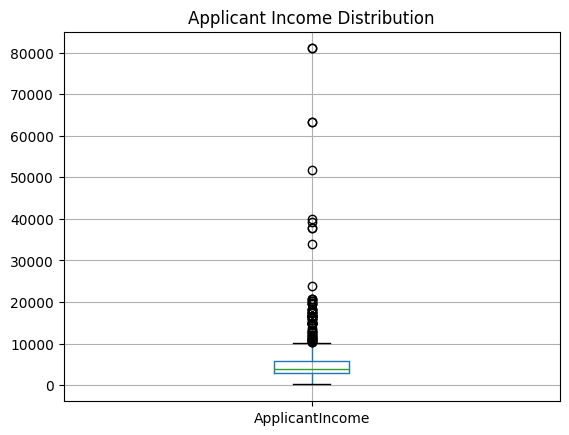

In [ ]:
Loan.boxplot(column = 'ApplicantIncome')
plt.title("Applicant Income Distribution")
plt.show()

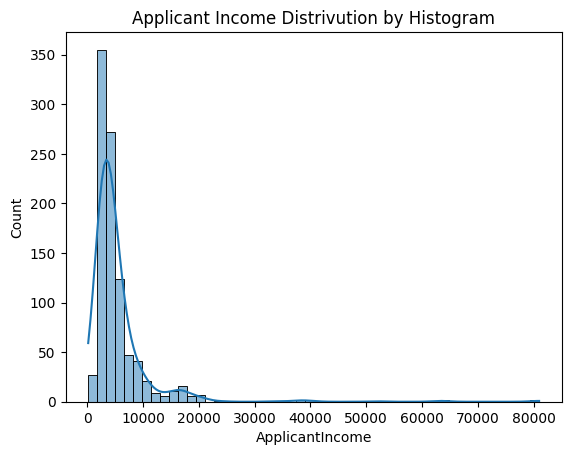

In [ ]:
sns.histplot(Loan['ApplicantIncome'].dropna(), bins=50, kde=True)
plt.title("Applicant Income Distrivution by Histogram")
plt.show()

* Histogram Result clearly shows that, applicant income is rightside skewed. need to normalize this by taking log.

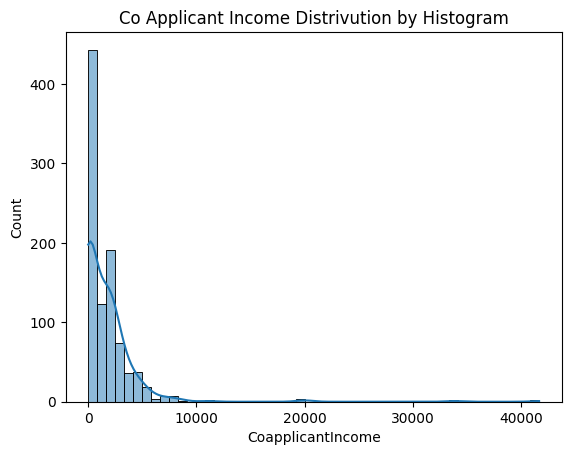

In [ ]:
sns.histplot(Loan['CoapplicantIncome'].dropna(), bins=50, kde=True)
plt.title("Co Applicant Income Distrivution by Histogram")
plt.show()

* Similarly Coapplicant income also right side skewed. need to normalize this right skew by log .

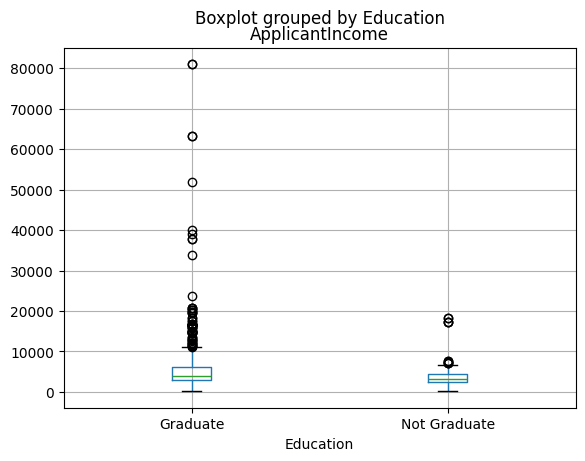

In [ ]:
Loan.boxplot(column = 'ApplicantIncome' , by = 'Education')
plt.show()

* Boxplots clearly shows some of applicants have high salary compare non educated applicant.

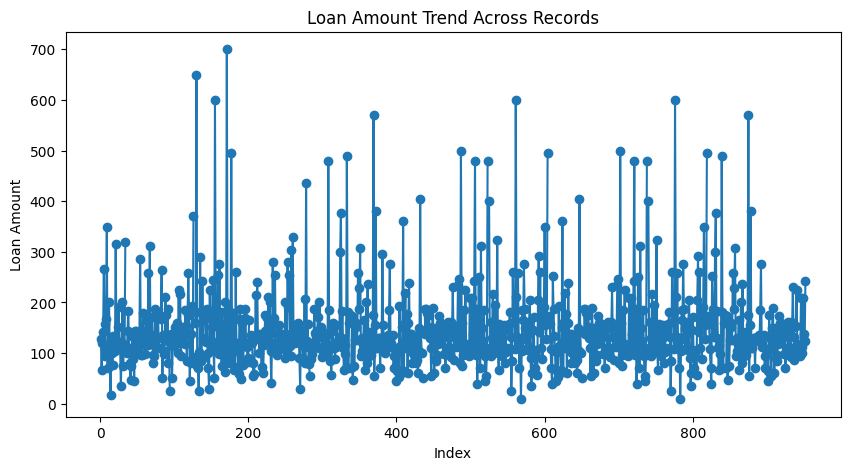

In [ ]:
# People who take loan amount across trends
plt.figure(figsize=(10, 5))
plt.plot(Loan.index, Loan['LoanAmount'], marker='o', linestyle='-')
plt.xlabel("Index")
plt.ylabel("Loan Amount")
plt.title("Loan Amount Trend Across Records")
plt.show()

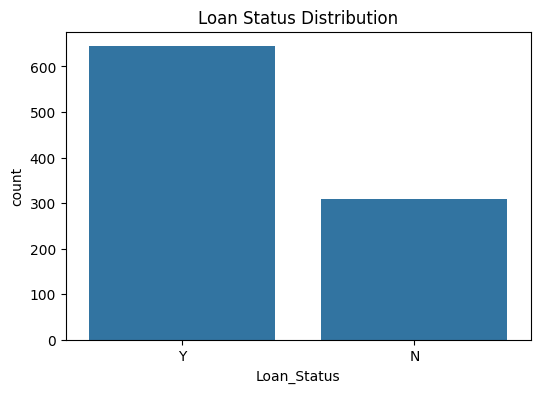

In [ ]:
# Loan status count  , where loan approved or reject .
plt.figure(figsize=(6,4))
sns.countplot(data=Loan, x='Loan_Status')
plt.title('Loan Status Distribution')
plt.show()

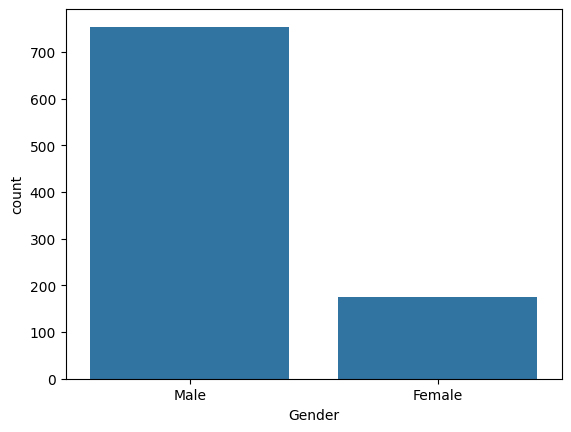

In [ ]:
# People who take loan as group by gender
sns.countplot(x=Loan['Gender'] )
plt.show()

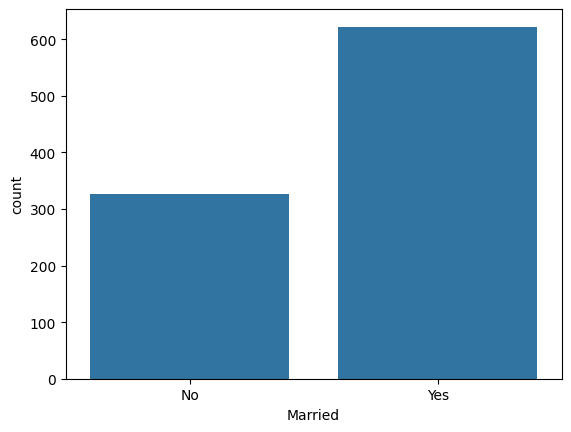

In [ ]:
# People who take loan as group by Marital status
sns.countplot(x='Married' , data = Loan )
plt.show()

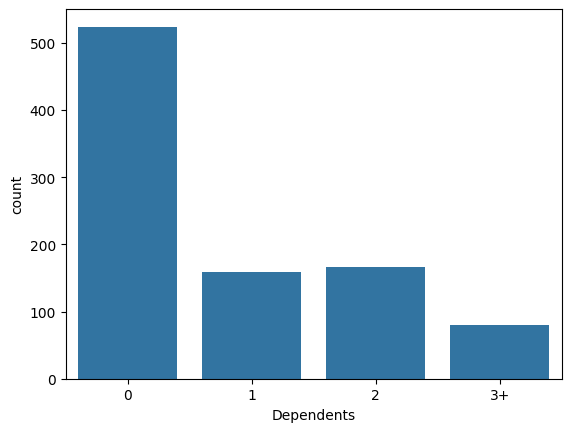

In [ ]:
# People who take loan as group by Dependents
sns.countplot(x='Dependents' , data = Loan  )
plt.show()

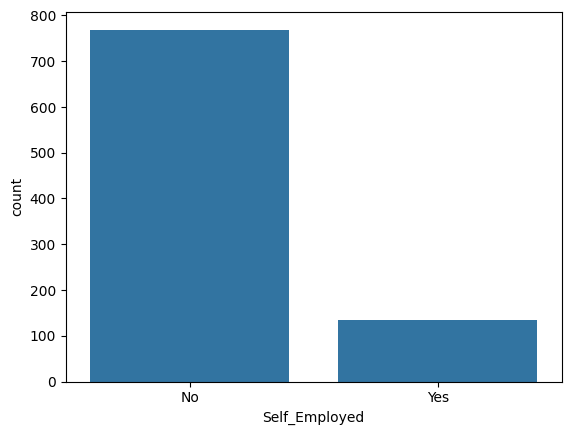

In [ ]:
# People who take Loan as Group by selfemployed
sns.countplot(x='Self_Employed' , data = Loan  )
plt.show()

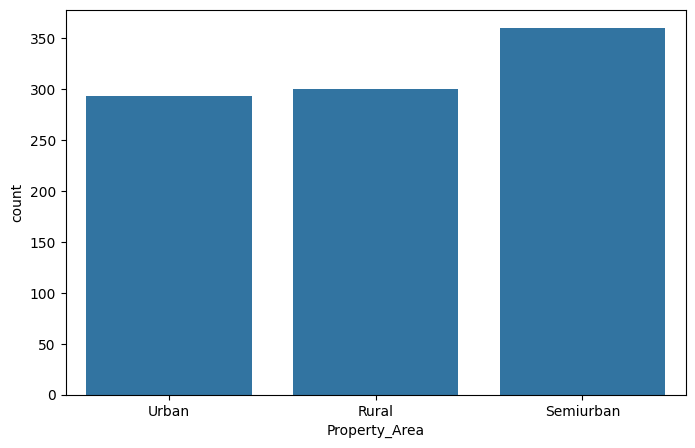

In [ ]:
# People who take loan  as group by Property Area
plt.figure(figsize=(8,5))
sns.countplot(x=Loan['Property_Area'] , data = Loan  )
plt.show()

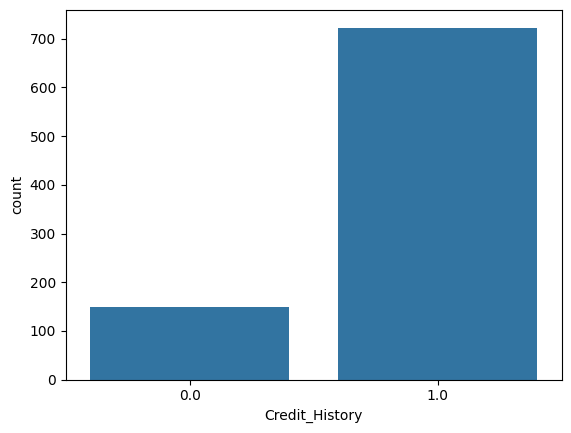

In [ ]:
# People who take  Loan as group by Credit history
sns.countplot(x='Credit_History' ,data = Loan)
plt.show()

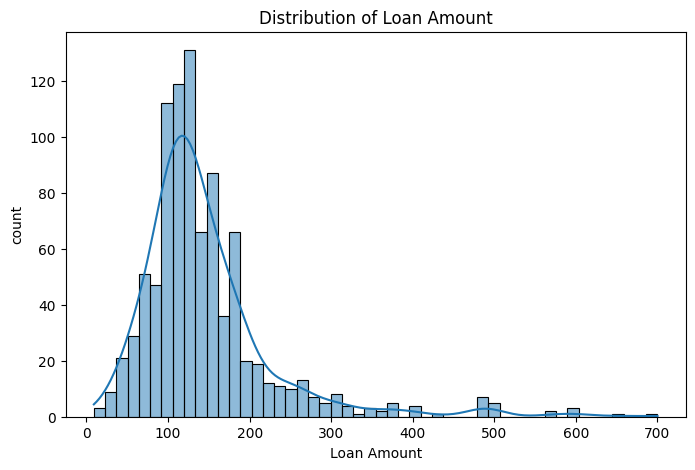

In [ ]:
# Plot distribution of the LoanAmount
plt.figure(figsize=(8,5))
sns.histplot(Loan['LoanAmount'].dropna(), bins=50, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('count')
plt.show()

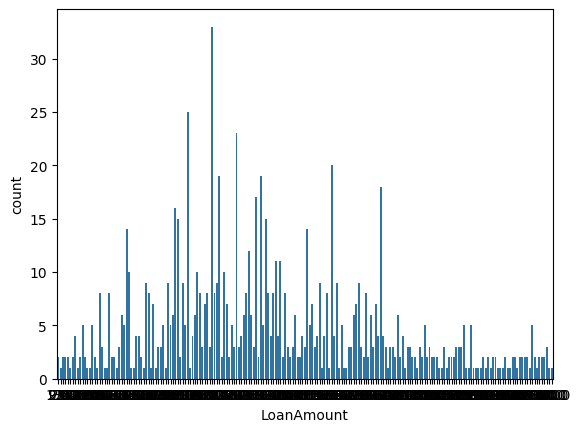

In [ ]:
# people who take loan as groupby  Loan amount
sns.countplot (x= 'LoanAmount' , data = Loan)
plt.show()

### Step 6.2 Bivariate Analysis

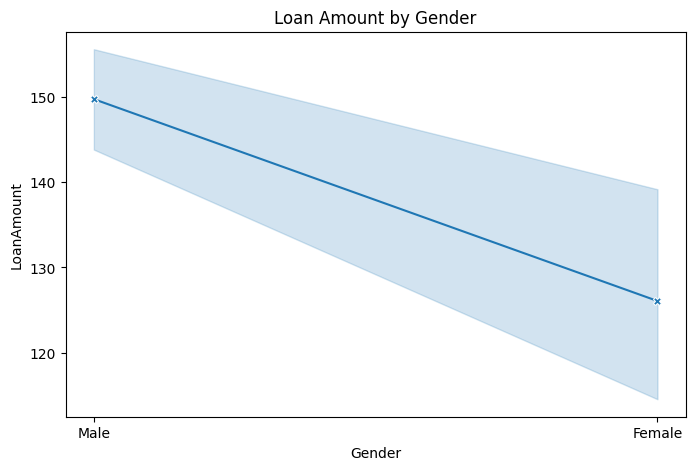

In [ ]:
# Loan amount based on Gender
plt.figure(figsize=(8,5))
sns.lineplot(x="Gender", y="LoanAmount", data=Loan, marker="X")
plt.title("Loan Amount by Gender")
plt.show()

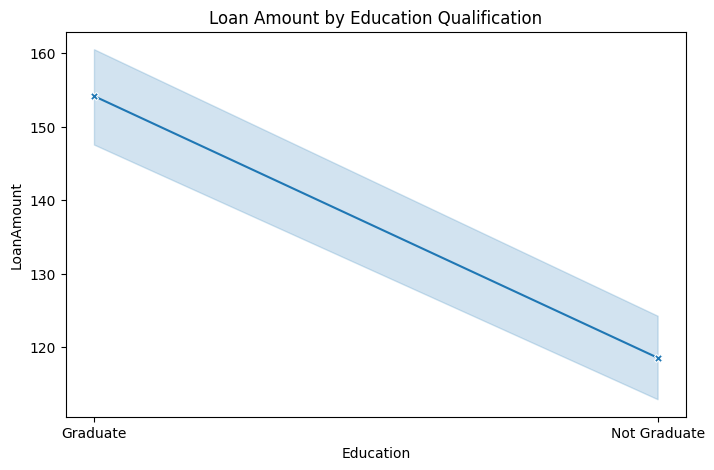

In [ ]:
#Loan amount based on education qualification
plt.figure(figsize=(8,5))
sns.lineplot(x="Education", y="LoanAmount", data=Loan, marker="X")
plt.title("Loan Amount by Education Qualification")
plt.show()


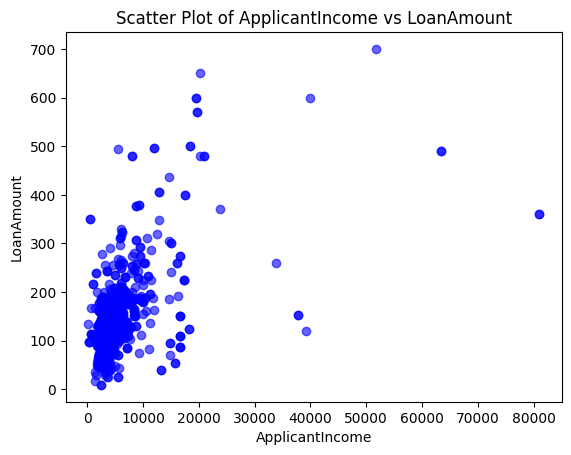

In [ ]:
# find relationship between Loanamount vs ApplicantIncome using scatter plot
plt.scatter( x= 'ApplicantIncome' , y='LoanAmount' ,data=Loan, color='blue', alpha=0.6)
plt.title('Scatter Plot of ApplicantIncome vs LoanAmount')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

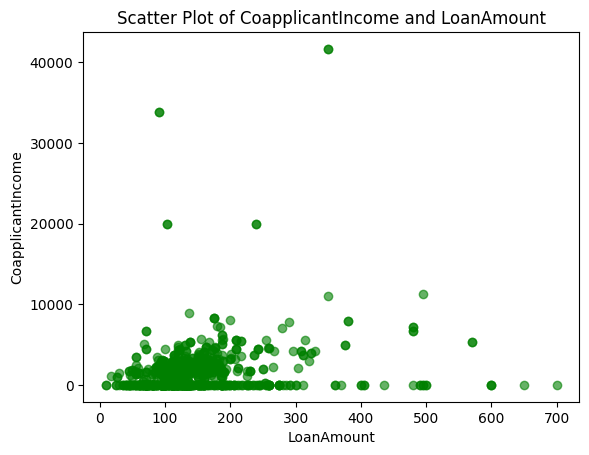

In [ ]:
# find relationship between LoanAmount and CoapplicantIncome using scatter plot
plt.scatter( x= 'LoanAmount' , y='CoapplicantIncome' ,data=Loan, color='green', alpha=0.6)
plt.title('Scatter Plot of CoapplicantIncome and LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('CoapplicantIncome')
plt.show()

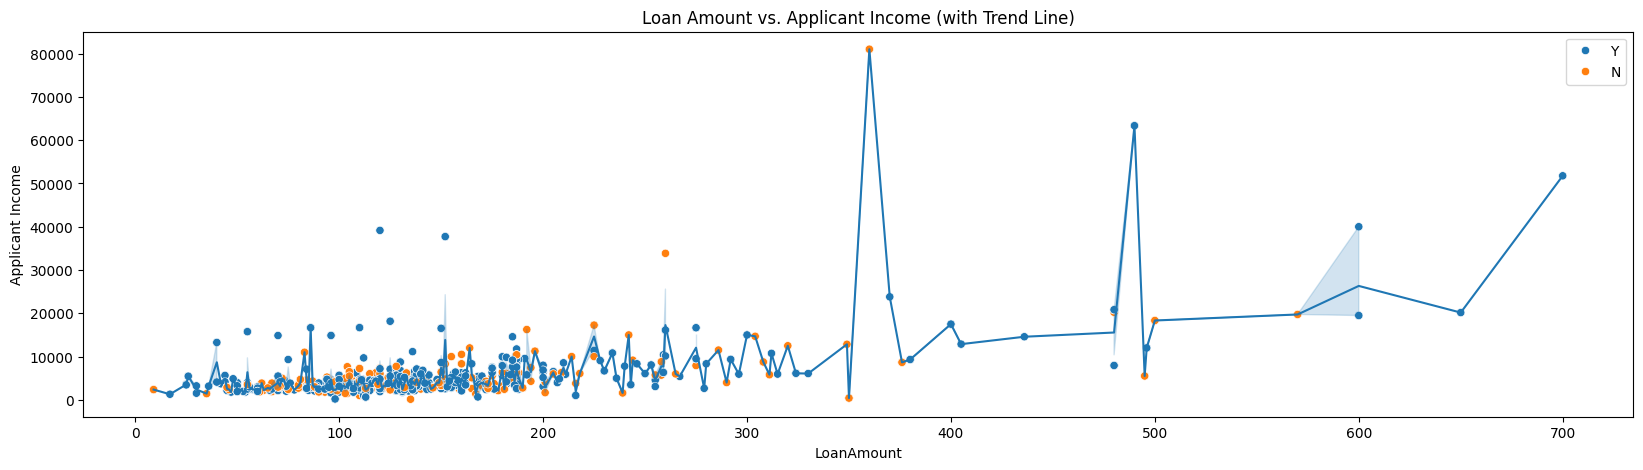

In [ ]:
# Plot Loan Amount vs. Applicant Income (with Trend Line) combine scatter and line plot
plt.figure(figsize=(20,5))
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', data=Loan)
sns.lineplot(x='LoanAmount', y='ApplicantIncome', data=Loan)
plt.title('Loan Amount vs. Applicant Income (with Trend Line)')
plt.xlabel('LoanAmount')
plt.ylabel('Applicant Income')
plt.show()

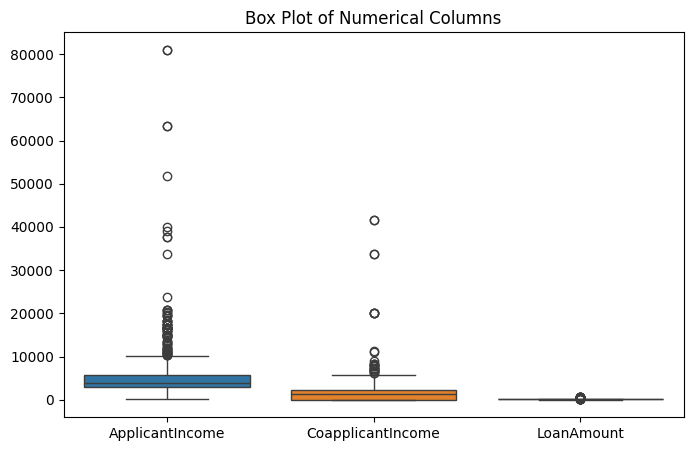

In [ ]:
# Box Plot of Numerical Columns
n = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(8,5))
sns.boxplot(data = Loan[n])
plt.title("Box Plot of Numerical Columns")
plt.show()

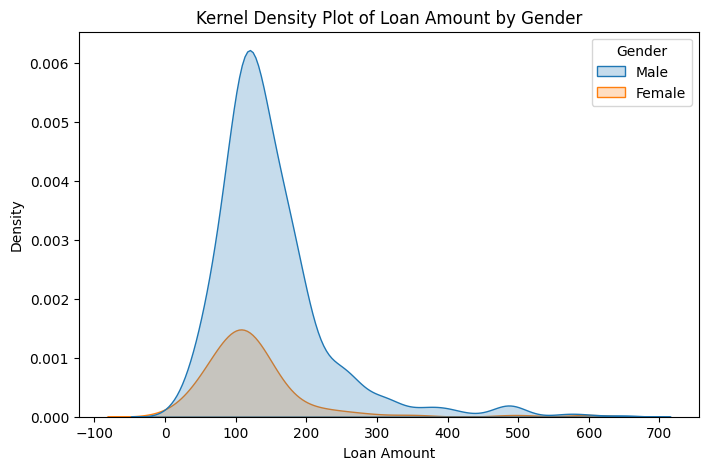

In [ ]:
# View Loan amount distribution by gender  using KDE plot
plt.figure(figsize=(8,5))
sns.kdeplot(data=Loan, x="LoanAmount", hue="Gender", fill=True)
plt.title("Kernel Density Plot of Loan Amount by Gender")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.show()

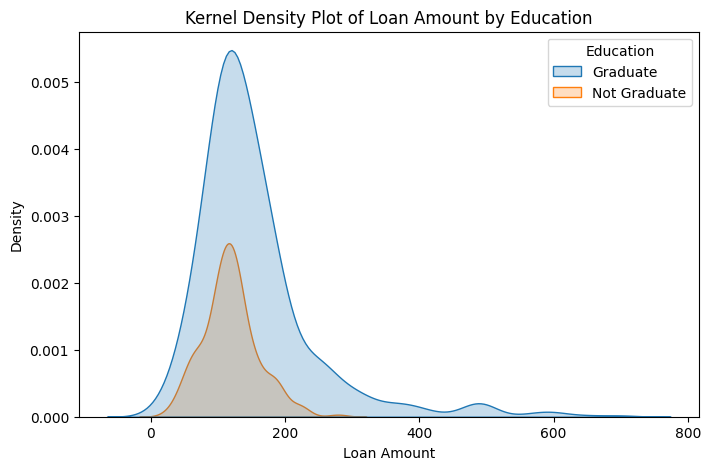

In [ ]:
# View Loan amount distribution by Education Qualification  using KDE plot
plt.figure(figsize=(8,5))
sns.kdeplot(data=Loan, x="LoanAmount", hue="Education", fill=True)
plt.title("Kernel Density Plot of Loan Amount by Education")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.show()

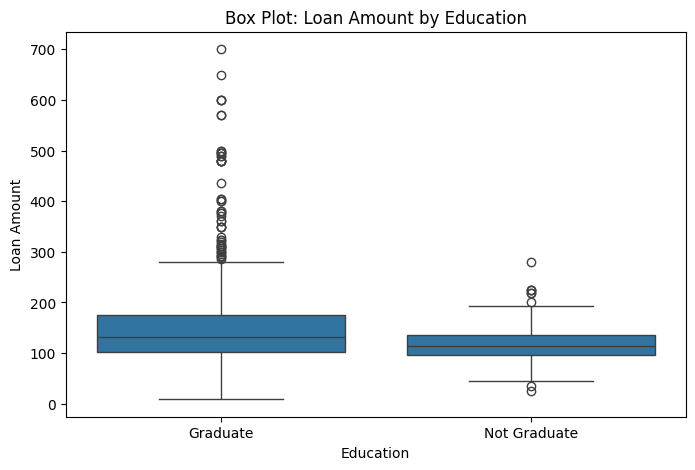

In [ ]:
# View Loan amount distribution by Eduaction qualification  using Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=Loan, x="Education", y="LoanAmount")
plt.title("Box Plot: Loan Amount by Education")
plt.xlabel("Education")
plt.ylabel("Loan Amount")
plt.show()

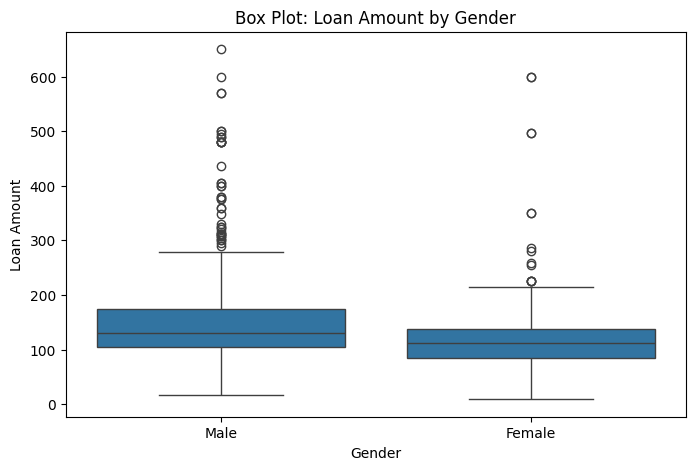

In [ ]:
# View Loan amount distribution by gender  using Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=Loan, x="Gender", y="LoanAmount")
plt.title("Box Plot: Loan Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Loan Amount")
plt.show()

### Step 6.3 Multivariate Analysis

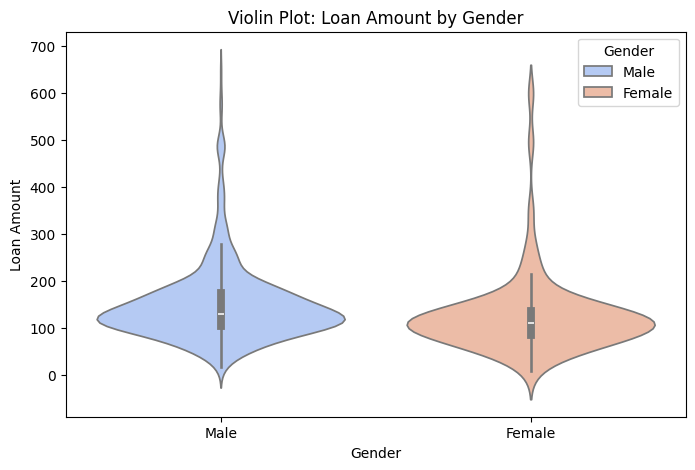

In [ ]:
# view loanAmount distribution  by gender using violin plot
plt.figure(figsize=(8,5))
sns.violinplot(data=Loan, x="Gender", y="LoanAmount",hue = "Gender", palette="coolwarm")
plt.title("Violin Plot: Loan Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Loan Amount")
plt.show()

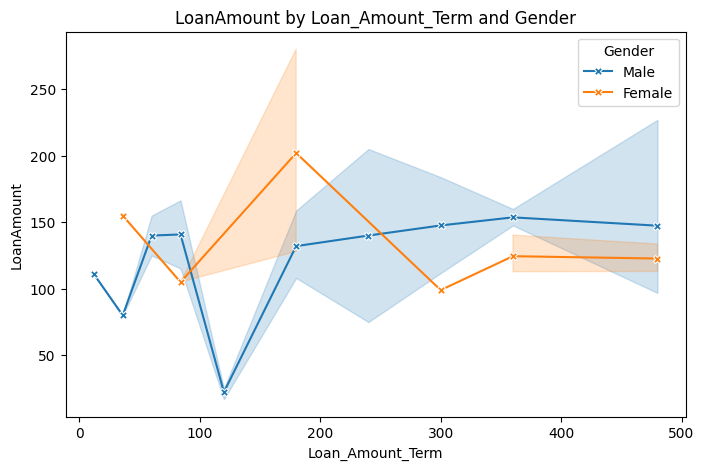

In [ ]:
# View LoanAmount by Loan_Amount_Term  using line plot
plt.figure(figsize=(8,5))
sns.lineplot(x="Loan_Amount_Term", y="LoanAmount", data=Loan, hue="Gender", marker="X")
plt.title("LoanAmount by Loan_Amount_Term and Gender")
plt.show()

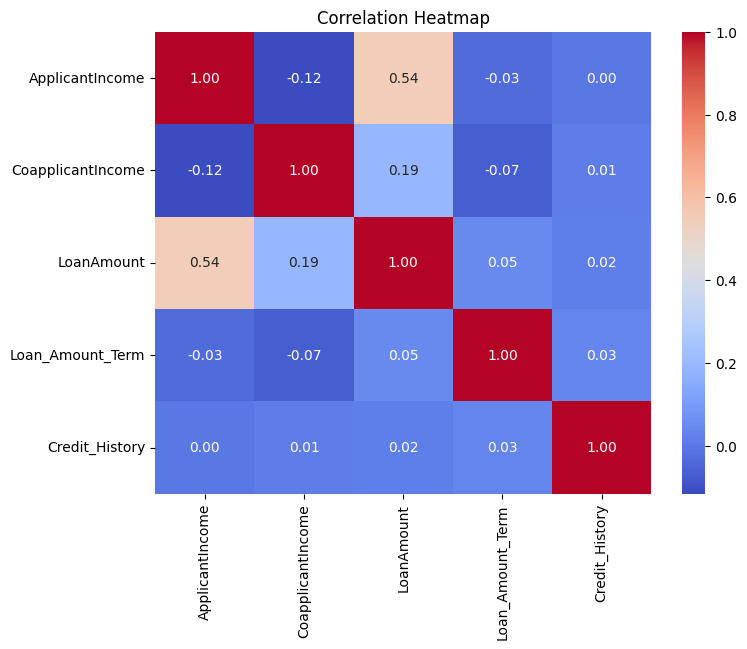

In [ ]:
# HeatMap between numerical columns to find correlation
plt.figure(figsize=(8,6))
sns.heatmap(Loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 5 : Pre processing

### Step 5.1 : Data Cleaning

In [ ]:
# Before performing data cleaning, it is essential to preserve the original dataset to avoid any risk of data loss
Loan_copy = Loan.copy()

In [ ]:
# 1.2. Check Unique Values in Categorical Columns: Identify the unique values in categorical columns:
# Gender: F (Female) & M (Male),
# Married: No (Not married) &  Yes (Married)
# Dependents : ['0' '1' '2' '3+' ]
# Self_Employed : 'No' (Own Business) &  'Yes'( Self Employed)
# Credit_History : 1 (Yes) &  0 (No)
# Review and correct any unexpected or incorrect values if necessary.
print(Loan['Married'].unique())
print(Loan['Gender'].unique())
print(Loan['Dependents'].unique())
print(Loan['Self_Employed'].unique())
print(Loan['Credit_History'].unique())

['No' 'Yes' nan]
['Male' 'Female' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[ 1.  0. nan]


In [ ]:
#  handle missing values remove 'nan'
Loan['Gender'] = Loan['Gender'].fillna(Loan['Gender'].mode()[0])
Loan['Married'] = Loan['Married'].fillna(Loan['Married'].mode()[0])
Loan['Dependents'] = Loan['Dependents'].fillna(Loan['Dependents'].mode()[0])
Loan['Self_Employed'] = Loan['Self_Employed'].fillna(Loan['Self_Employed'].mode()[0])
Loan['Credit_History'] = Loan['Credit_History'].fillna(Loan['Credit_History'].mode()[0])

print(Loan['Married'].unique())
print(Loan['Gender'].unique())
print(Loan['Dependents'].unique())
print(Loan['Self_Employed'].unique())
print(Loan['Credit_History'].unique())

['No' 'Yes']
['Male' 'Female']
['0' '1' '2' '3+']
['No' 'Yes']
[1. 0.]


In [ ]:
# Identify the missing values in numerical columns
print( " Missing Values in Loan Amount      :",Loan['LoanAmount'].isnull().sum())

 Missing Values in Loan Amount      : 32


In [ ]:
# Handle Missing values Impute Mean values  because LoanAmount is continous values
Loan['LoanAmount'] = Loan['LoanAmount'].fillna(Loan['LoanAmount'].mean())
# Handle Missing values Impute Mode because LoanAmountTerm is numerical values
Loan['Loan_Amount_Term'] = Loan['Loan_Amount_Term'].fillna(Loan['Loan_Amount_Term'].mode()[0])
#Check the missing values in numerical columns
print( " Missing Values in Loan Amount      :",Loan['LoanAmount'].isnull().sum())
print(" Missing Values in Loan Amount Term :",Loan['Loan_Amount_Term'].isnull().sum())

 Missing Values in Loan Amount      : 0
 Missing Values in Loan Amount Term : 0


In [ ]:
# Statistical Summary of Numerical Columns: Generate a statistical summary (mean, median, min, max, standard deviation) for all numerical columns to gain
# insights into the data's distribution.
Loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,953.000000,953.000000,953.000000,953.000000,953.000000
mean,5433.144806,1671.703085,146.163952,341.338930,0.843652
std,6288.391469,3164.094759,83.220032,65.412231,0.363376
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2873.000000,0.000000,100.000000,360.000000,1.000000
50%,3775.000000,1250.000000,130.000000,360.000000,1.000000
75%,5818.000000,2306.000000,162.000000,360.000000,1.000000
max,81002.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
Loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

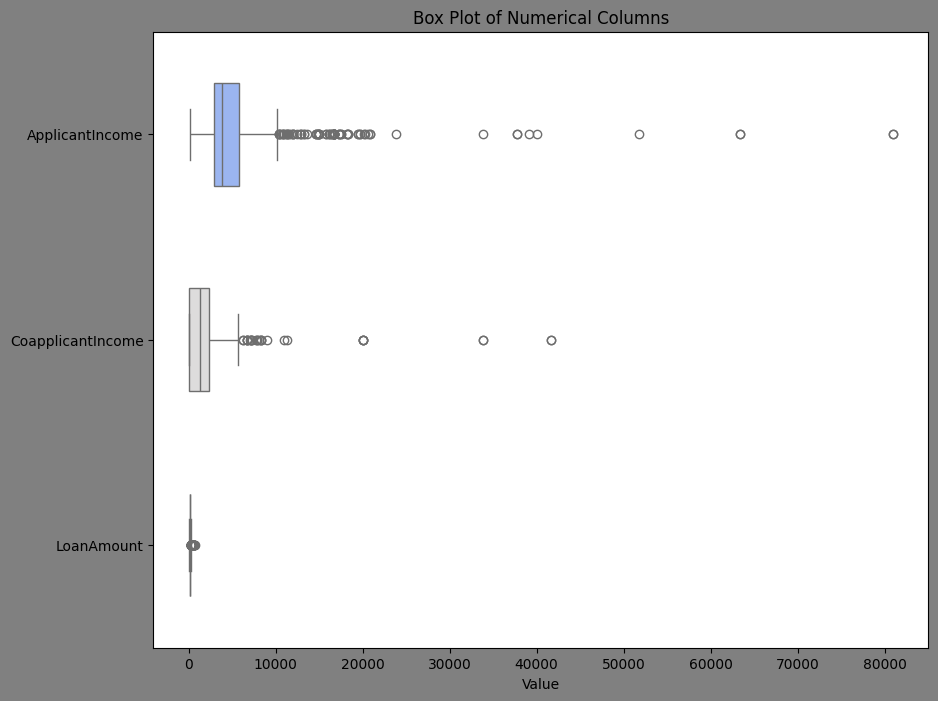

In [ ]:
# Box Plot of Numerical Columns: Create a box plot for all numerical columns in a single graph to visualize their distribution, range, and outliers.
# Explain any visible trends or outliers
n = [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(10, 8),facecolor='grey')
sns.boxplot(data=Loan[n],orient='h',width=0.5,palette='coolwarm')
plt.xlabel('Value')
plt.title('Box Plot of Numerical Columns')
plt.show()

# Explain any visible trends or outliers
* ApplicantIncome and CoApplicantIncome has extreme outliers, meaning some applicants earn significantly more than others.
* LoanAmount has a few outliers, suggesting some applicants request much higher loans.
* Loan Term & Credit History are mostly stable, with minimal values.

# Retain Outliers:
* Retain outliers if they represent real scenarios (e.g., high-income applicants taking large loans). They might be crucial for model learning.


In [ ]:
 # Check for Duplicates: Identify any duplicate rows and remove them to avoid redundant data in analysis
 # Check for duplicate rows
print("No of Dublicate Rows : ",Loan.duplicated().sum())
print("Duplicate Rows:")
Loan[Loan.duplicated()]
# Remove Dublicate Rows
Loan_cleaned = Loan.drop_duplicates()
print("\nDataFrame after removing duplicates:")
Loan_cleaned

No of Dublicate Rows :  328
Duplicate Rows:

DataFrame after removing duplicates:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.163952,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,LP002484,Male,Yes,3+,Graduate,No,7740,0.0,128.000000,180.0,1.0,Urban,N
940,LP002582,Female,No,0,Not Graduate,Yes,17263,0.0,225.000000,360.0,1.0,Semiurban,N
949,LP002615,Male,Yes,2,Graduate,No,4865,5625.0,208.000000,360.0,1.0,Semiurban,Y
951,LP002619,Male,Yes,0,Not Graduate,No,3814,1484.0,124.000000,300.0,1.0,Semiurban,Y


### **Step  5.2 : Data Transformation**:

#### 5.2.1.**Feature Engineering**: Apply Mapping method for the categorical column Gender , Married , Education,Dependents,Self_Employed,Property_Area, Credit_History and Loan_Status to convert it into numeric format for Model-building purposes.

In [ ]:
Loan_cleaned.replace({ "Loan_Status": {'N': 0, 'Y': 1},
                      "Gender": {'Male': 0, 'Female': 1},
                      "Education": {'Not Graduate': 0, 'Graduate': 1},
                      "Married": {'No': 0, 'Yes': 1},
                      "Self_Employed": {'No': 0, 'Yes': 1},
                      "Property_Area":{'Urban' : 2, 'Rural' : 0, 'Semiurban' : 1},
                      "Dependents" : {'0' : 0 ,'1' : 1, '2' :2, '3+' : 4}}, inplace=True)


In [ ]:
# After label encoding Categorical values change into numerical values
Loan_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625 entries, 0 to 952
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            625 non-null    object 
 1   Gender             625 non-null    int64  
 2   Married            625 non-null    int64  
 3   Dependents         625 non-null    int64  
 4   Education          625 non-null    int64  
 5   Self_Employed      625 non-null    int64  
 6   ApplicantIncome    625 non-null    int64  
 7   CoapplicantIncome  625 non-null    float64
 8   LoanAmount         625 non-null    float64
 9   Loan_Amount_Term   625 non-null    float64
 10  Credit_History     625 non-null    float64
 11  Property_Area      625 non-null    int64  
 12  Loan_Status        625 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 68.4+ KB


**5.2.2. Feature Scaling:** Standardize the numerical columns that have varying scales ("ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term") to ensure consistent contribution in subsequent analyses.

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of columns to standardize
columns_to_scale = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
# Create a StandardScaler instance
scaler = StandardScaler()
# Apply standardization to the selected columns
Loan_cleaned[columns_to_scale] = scaler.fit_transform(Loan_cleaned[columns_to_scale])
# Display the first few rows of the standardized columns
Loan_cleaned[columns_to_scale]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.045805,-0.554714,-0.009357,0.276582
1,-0.140778,-0.036440,-0.225648,0.276582
2,-0.374082,-0.554714,-0.963926,0.276582
3,-0.435539,0.255690,-0.320910,0.276582
4,0.068060,-0.554714,-0.070848,0.276582
...,...,...,...,...
920,0.324501,-0.554714,-0.225648,-2.526613
940,1.728005,-0.554714,0.929399,0.276582
949,-0.099217,1.378502,0.726968,0.276582
951,-0.254114,-0.044689,-0.273279,-0.657816


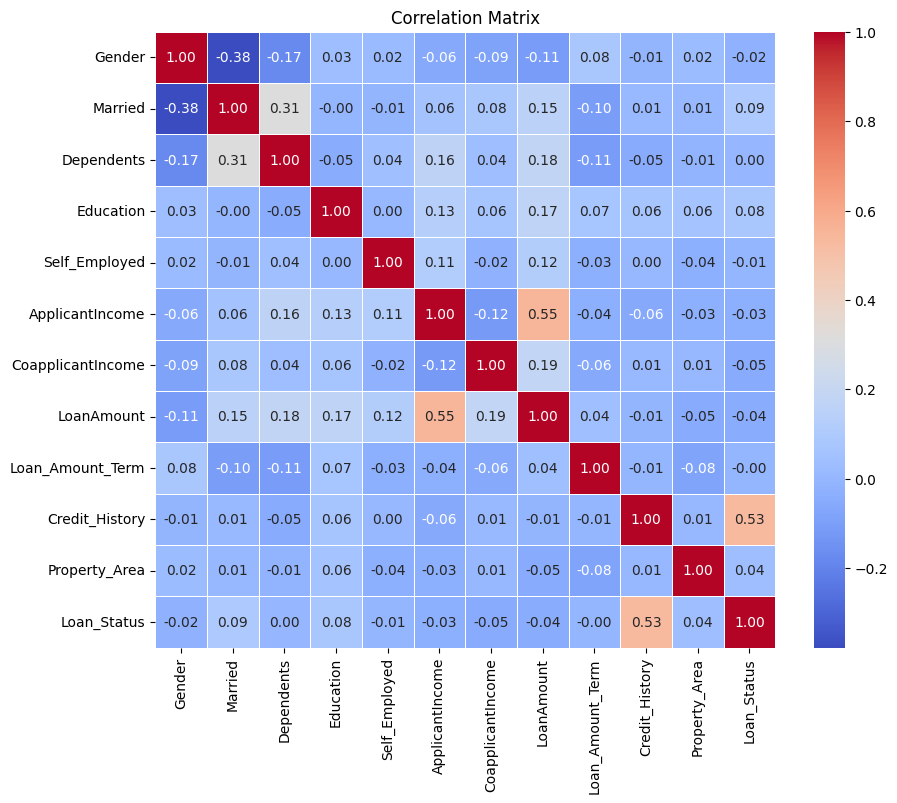

In [ ]:
num = Loan_cleaned.select_dtypes(exclude ='object')
# Compute the correlation matrix
correlation_matrix = num.corr()
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Focus on the correlation with 'LoanStatus'
correlation_with_LoanStatus = correlation_matrix["Loan_Status"].sort_values(ascending=False)
print("Correlation with LoanStatus:")
print(correlation_with_LoanStatus)

Correlation with LoanStatus:
Loan_Status          1.000000
Credit_History       0.529422
Married              0.094404
Education            0.084817
Property_Area        0.035557
Dependents           0.002952
Loan_Amount_Term    -0.003137
Self_Employed       -0.005826
Gender              -0.018761
ApplicantIncome     -0.033507
LoanAmount          -0.044413
CoapplicantIncome   -0.053131
Name: Loan_Status, dtype: float64


### **Preprocessing Conclusion:**
* **Label Encoding:**
     * Categorical features (e.g., Gender, Married, Education, Dependents) were converted to numeric values for model compatibility.
* **Feature Scaling:**
    * StandardScaler was applied to numerical columns (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term) to standardize values, giving them a mean of 0 and a standard deviation of 1.

* **Correlation Analysis:**
    * The correlation between Loan_Status and Credit_History is moderate (0.53), indicating that credit history has a notable impact on loan approval. Other features show minimal correlation with Loan_Status.
* **Non-Numeric Column Handling:**
    * Non-numeric columns, like Loan_ID, were excluded from the analysis.

***The data is now ready for model-building.***

# **Feature selection:**

In [ ]:
original_features =  Loan_cleaned.columns
print(original_features)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
# Loan ID is unique value, didnt give any impact to the Loan Prediction , so drop the Loan_ID column
Loan_cleaned = Loan_cleaned.drop('Loan_ID' , axis=1)
Loan_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,0.045805,-0.554714,-0.009357,0.276582,1.0,2,1
1,0,1,1,1,0,-0.140778,-0.036440,-0.225648,0.276582,1.0,0,0
2,0,1,0,1,1,-0.374082,-0.554714,-0.963926,0.276582,1.0,2,1
3,0,1,0,0,0,-0.435539,0.255690,-0.320910,0.276582,1.0,2,1
4,0,0,0,1,0,0.068060,-0.554714,-0.070848,0.276582,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
920,0,1,4,1,0,0.324501,-0.554714,-0.225648,-2.526613,1.0,2,0
940,1,0,0,0,1,1.728005,-0.554714,0.929399,0.276582,1.0,1,0
949,0,1,2,1,0,-0.099217,1.378502,0.726968,0.276582,1.0,1,1
951,0,1,0,0,0,-0.254114,-0.044689,-0.273279,-0.657816,1.0,1,1


In [ ]:
Loan_cleaned.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

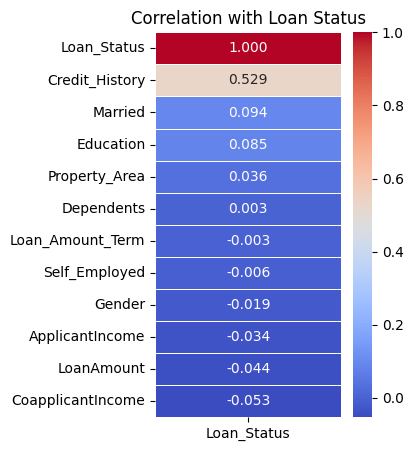

In [ ]:
# To find highly correlated features by correlation heatmap
cor = Loan_cleaned.corr()['Loan_Status'].sort_values(ascending=False).to_frame()
# Plot the heatmap
plt.figure(figsize=(3, 5))  # Adjust figure size
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Correlation with Loan Status')
plt.show()

# **Based on domain knowledge and correlation analysis, the most relevant features are:**
### **Selected Features:**
* **Loan_Status (1.000000)**: Target variable for loan approval.
* **Credit_History (0.529422)**: Moderate positive correlation; a good credit history increases approval chances.
* **Married (0.094404)**: Low positive correlation; marital status slightly influences approval.
* **Education (0.084817):** Low positive correlation; education has a small impact.
* **Applicant_Income & CoapplicantIncome:** Very weak positive correlation; combined income matters but with a small influence.
* **Property_Area (0.035557):** Very low positive correlation; location has minor influence on approval.


### **Dropped Features:**
* Self_Employed (-0.006) : Minimal impact; already covered by income features.
* Gender (-0.019) : Should not influence loan approval (avoid bias).
* Dependents (0.003) : Very weak correlation; impact on affordability is indirect.

In [ ]:
# combine both ApplicantIncome and CoapplicantIncome column into a single feature: (To avoid feature redundancy)
Loan_cleaned['Total_Income'] = Loan_cleaned['ApplicantIncome'] + Loan_cleaned['CoapplicantIncome']
Loan_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,1,0,0.045805,-0.554714,-0.009357,0.276582,1.0,2,1,-0.508909
1,0,1,1,1,0,-0.140778,-0.036440,-0.225648,0.276582,1.0,0,0,-0.177219
2,0,1,0,1,1,-0.374082,-0.554714,-0.963926,0.276582,1.0,2,1,-0.928796
3,0,1,0,0,0,-0.435539,0.255690,-0.320910,0.276582,1.0,2,1,-0.179849
4,0,0,0,1,0,0.068060,-0.554714,-0.070848,0.276582,1.0,2,1,-0.486654
...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0,1,4,1,0,0.324501,-0.554714,-0.225648,-2.526613,1.0,2,0,-0.230213
940,1,0,0,0,1,1.728005,-0.554714,0.929399,0.276582,1.0,1,0,1.173291
949,0,1,2,1,0,-0.099217,1.378502,0.726968,0.276582,1.0,1,1,1.279285
951,0,1,0,0,0,-0.254114,-0.044689,-0.273279,-0.657816,1.0,1,1,-0.298803


In [ ]:
drop_features = ['Self_Employed' , 'Gender' ,'Dependents','ApplicantIncome','CoapplicantIncome']
Loan_cleaned = Loan_cleaned.drop(columns=drop_features)
Loan_cleaned

,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,-0.009357,0.276582,1.0,2,1,-0.508909
1,1,1,-0.225648,0.276582,1.0,0,0,-0.177219
2,1,1,-0.963926,0.276582,1.0,2,1,-0.928796
3,1,0,-0.320910,0.276582,1.0,2,1,-0.179849
4,0,1,-0.070848,0.276582,1.0,2,1,-0.486654
...,...,...,...,...,...,...,...,...
920,1,1,-0.225648,-2.526613,1.0,2,0,-0.230213
940,0,0,0.929399,0.276582,1.0,1,0,1.173291
949,1,1,0.726968,0.276582,1.0,1,1,1.279285
951,1,0,-0.273279,-0.657816,1.0,1,1,-0.298803


In [ ]:
selected_features = Loan_cleaned.columns
print("Original Feature Shape",original_features.shape)
print("Selected Feature Shape",selected_features.shape)

Original Feature Shape (13,)
Selected Feature Shape (8,)


# **Model Building:**

In [ ]:
from collections import Counter
print(f"Original class distribution: {Counter(Loan_cleaned['Loan_Status'])}")

Original class distribution: Counter({1: 421, 0: 204})


* Its look like , class imbalance in my dataset, where 421 instances of class 1 (Loan approved status) and 204 instances of class 0 (Loan NON approved status).
* To balance my dataset , I go with resampling technique (SMOTE).

In [ ]:
# Create Features (X) and Target (y)
X = Loan_cleaned.drop(columns=['Loan_Status'])
y = Loan_cleaned['Loan_Status']

In [ ]:
# split the data into feature and Target
# import required library
# Perform stratified split to maintain class distribution
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

Training Set: (500, 7), (500,)
Testing Set: (125, 7), (125,)


In [ ]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

The goal of this Project is to evaluate and compare the accuracy of different machine learning approaches  so, now train Different  machine learning Models.

Train 6 models and compare their accuracy:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)
5. Gradient Boosting Machines (GBM)
6. Naive Bayes (NB)

In [ ]:
# first model Logistic Regression model . Import Lirary
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

LR_model = LogisticRegression()
LR_model.fit(X_train_resampled,y_train_resampled)
LR_pred = LR_model.predict(X_test)
print("Logistic Regression Accuracy:",accuracy_score(y_test,LR_pred))
print("ROC_AUC "  , roc_auc_score(y_test, LR_pred))
print(classification_report(y_test,LR_pred))
LR_pred_prob = LR_model.predict_proba(X_test)[:, 1]

Logistic Regression Accuracy: 0.8
ROC_AUC  0.7388211382113821
              precision    recall  f1-score   support

           0       0.77      0.56      0.65        41
           1       0.81      0.92      0.86        84

    accuracy                           0.80       125
   macro avg       0.79      0.74      0.75       125
weighted avg       0.80      0.80      0.79       125



# **My Observation:**

* **Accuracy:** 79.2%. A strong overall performance of the Logistic Regression model.

* **Precision** for Class 0 (Loan Not Approved): 0.76. High precision, meaning when the model predicts class 0, its correct 76% of the time.

* **Recall** for Class 1 (Loan Approved): 0.92. Very high recall, indicating that the model correctly identifies 92% of the actual loan approvals.

* **F1-Score** for Class 1 (Loan Approved): 0.86. A strong balance between precision and recall for loan approvals.

* **Macro** Average: Precision of 0.78, recall of 0.73, and F1-score of 0.74. Reflects a good performance across both classes.

* **Weighted Average**: Precision of 0.79, recall of 0.79, and F1-score of 0.78 . A solid overall performance considering the class distribution.


In [ ]:
# Decision tree model
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_resampled,y_train_resampled)
DT_pred = DT_model.predict(X_test)
print("Decision Tree classifier Accuracy",accuracy_score(y_test,DT_pred))
print("ROC_AUC "  , roc_auc_score(y_test, DT_pred))
print(classification_report(y_test,DT_pred))
DT_pred_prob = DT_model.predict_proba(X_test)[:, 1]

Decision Tree classifier Accuracy 0.656
ROC_AUC  0.6379210220673636
              precision    recall  f1-score   support

           0       0.48      0.59      0.53        41
           1       0.77      0.69      0.73        84

    accuracy                           0.66       125
   macro avg       0.63      0.64      0.63       125
weighted avg       0.68      0.66      0.66       125



**My Observation:**

* **Accuracy:** 64.8% :A moderate overall performance of the Decision Tree model.

* **Precision** for Class 0 (Loan Not Approved): 0.47 : Low precision, meaning when the model predicts class 0, its correct only 47% of the time.

* **Recall** for Class 1 (Loan Approved): 0.68 : Moderate recall, indicating that the model correctly identifies 68% of the actual loan approvals.

* **F1-Score** for Class 1 (Loan Approved): 0.72 . A decent balance between precision and recall for loan approvals.

* **Macro Average:** Precision of 0.62, recall of 0.63, and F1-score of 0.62. Reflects a moderately balanced performance across both classes.

* **Weighted Average:** Precision of 0.67, recall of 0.65, and F1-score of 0.66. A moderate overall performance considering the class distribution.

In [ ]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
RT_model = RandomForestClassifier()
RT_model.fit(X_train_resampled,y_train_resampled)
RT_pred = RT_model.predict(X_test)
print("Random Forest Classifier Accuracy score" , accuracy_score(y_test,RT_pred))
print("ROC_AUC "  , roc_auc_score(y_test, RT_pred))
print(classification_report(y_test,RT_pred))
RT_pred_prob = RT_model.predict_proba(X_test)[:, 1]

Random Forest Classifier Accuracy score 0.68
ROC_AUC  0.6432926829268293
              precision    recall  f1-score   support

           0       0.51      0.54      0.52        41
           1       0.77      0.75      0.76        84

    accuracy                           0.68       125
   macro avg       0.64      0.64      0.64       125
weighted avg       0.68      0.68      0.68       125



;**My Observation:**

* **Accuracy:** 64.8% : A moderate overall performance of the Random Forest model.

* **Precision** for Class 0 (Loan Not Approved): 0.47:  Low precision, meaning when the model predicts class 0, it's correct only 47% of the time.

* **Recall** for Class 1 (Loan Approved): 0.71 : Decent recall, indicating that the model correctly identifies 71% of the actual loan approvals.

* **F1-Score** for Class 1 (Loan Approved): 0.73:  A good balance between precision and recall for loan approvals.

* **Macro Average**: Precision, recall, and F1-score of 0.61 : Reflects a balanced but moderate overall performance across both classes.

* **Weighted Average:** Precision of 0.66, recall of 0.65, and F1-score of 0.65 : Shows a moderate overall performance, considering the class distribution.

In [ ]:
# Support Vector machine classifier
from sklearn.svm import SVC
SVC_model = SVC(probability=True)
SVC_model.fit(X_train_resampled,y_train_resampled)
SVC_pred = SVC_model.predict(X_test)
print("Support Vector Machine Accuracy score:" , accuracy_score(y_test,SVC_pred))
print("ROC_AUC "  , roc_auc_score(y_test, SVC_pred))
print(classification_report(y_test,SVC_pred))
SVC_pred_prob = SVC_model.predict_proba(X_test)[:, 1]

Support Vector Machine Accuracy score: 0.744
ROC_AUC  0.690911730545877
              precision    recall  f1-score   support

           0       0.63      0.54      0.58        41
           1       0.79      0.85      0.82        84

    accuracy                           0.74       125
   macro avg       0.71      0.69      0.70       125
weighted avg       0.74      0.74      0.74       125



**My Observation**:

* **Accuracy:** 76% : A good overall performance of the Support Vector Machine model.

* **Precision** for Class 0 (Loan Not Approved): 0.67 : Moderate precision, meaning when the model predicts class 0, its correct 67% of the time.

* **Recall** for Class 1 (Loan Approved): 0.87 : Very high recall, indicating that the model correctly identifies 87% of the actual loan approvals.

* **F1-Score** for Class 1 (Loan Approved): 0.83 : A strong balance between precision and recall for loan approvals.

* **Macro Average:** Precision of 0.73, recall of 0.70, and F1-score of 0.71 : Reflects the overall balanced but moderate performance across both classes.

* **Weighted Average:** Precision of 0.75, recall of 0.76, and F1-score of 0.75 : A solid overall performance considering the class distribution.

In [ ]:
# Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train_resampled,y_train_resampled)
GB_pred = GB_model.predict(X_test)
print("Gradient Boosting Accuracy score", accuracy_score(y_test,GB_pred))
print("ROC_AUC "  , roc_auc_score(y_test, GB_pred))
print(classification_report(y_test,GB_pred))
GB_pred_prob = GB_model.predict_proba(X_test)[:, 1]

Gradient Boosting Accuracy score 0.712
ROC_AUC  0.6795876887340302
              precision    recall  f1-score   support

           0       0.56      0.59      0.57        41
           1       0.79      0.77      0.78        84

    accuracy                           0.71       125
   macro avg       0.68      0.68      0.68       125
weighted avg       0.72      0.71      0.71       125



**My Observation:**

* **Accuracy:** 71.2% : A moderate overall performance of the Gradient Boosting model.

* **Precision** for Class 0 (Loan Not Approved): 0.56 : Moderate precision, meaning when the model predicts class 0, its correct about 56% of the time.

* **Recall** for Class 1 (Loan Approved): 0.79 : Good recall, indicating the model correctly identifies 79% of the actual loan approvals.

* **F1-Score** for Class 1 (Loan Approved): 0.79 : A good balance between precision and recall for loan approvals.

* **Macro Average**: Precision, recall, and F1-score of 0.67 : Indicates a balanced but moderate overall performance across both classes.

* **Weighted Average**: Precision, recall, and F1-score of 0.71 : Reflects the model's overall performance, considering the class distribution.

In [ ]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train_resampled,y_train_resampled)
NB_pred = NB_model.predict(X_test)
print('Navive Bayes Accuracy Score',accuracy_score(y_test,NB_pred))
print("ROC_AUC "  , roc_auc_score(y_test, NB_pred))
print(classification_report(y_test,NB_pred))
NB_pred_prob = NB_model.predict_proba(X_test)[:, 1]

Navive Bayes Accuracy Score 0.792
ROC_AUC  0.7016550522648084
              precision    recall  f1-score   support

           0       0.86      0.44      0.58        41
           1       0.78      0.96      0.86        84

    accuracy                           0.79       125
   macro avg       0.82      0.70      0.72       125
weighted avg       0.80      0.79      0.77       125



**My Observation:**

* **Accuracy:** 80% — A decent overall performance of the model.

* **Precision** for Class 0 (Loan Not Approved): 0.86 — High precision, meaning when the model predicts a loan as "Not Approved," it is usually correct.

* **Recall** for Class 1 (Loan Approved): 0.96 — Very high recall, indicating that the model correctly identifies most of the actual loan approvals.

* **F1-Score** for Class 1 (Loan Approved): 0.87 — A good balance of precision and recall for loan approvals, reflecting reliable predictions.

# **Compare Model Performance**

In [ ]:
model_scores = {
    "Logistic Regression": accuracy_score(y_test, LR_pred),
    "Decision Tree": accuracy_score(y_test, DT_pred),
    "Random Forest": accuracy_score(y_test, RT_pred),
    "SVM": accuracy_score(y_test, SVC_pred),
    "Gradient Boosting": accuracy_score(y_test, GB_pred),
    "Navie Bayes" : accuracy_score(y_test , NB_pred)

}

All_Model_Score = pd.DataFrame(list(model_scores.items()), columns=["Model", "Accuracy"])
score = All_Model_Score.sort_values(by='Accuracy' ,ascending=False)
print(score)

                 Model  Accuracy
0  Logistic Regression     0.800
5          Navie Bayes     0.792
3                  SVM     0.744
4    Gradient Boosting     0.712
2        Random Forest     0.680
1        Decision Tree     0.656


In [ ]:
model_roc_auc_score = {
    "Logistic Regression": roc_auc_score(y_test, LR_pred),
    "Decision Tree": roc_auc_score(y_test, DT_pred),
    "Random Forest": roc_auc_score(y_test, RT_pred),
    "SVM": roc_auc_score(y_test, SVC_pred),
    "Gradient Boosting": roc_auc_score(y_test, GB_pred),
    "Navie Bayes" : roc_auc_score(y_test , NB_pred)

}
All_Model_roc_auc_score = pd.DataFrame(list(model_scores.items()), columns=["Model", "ROC_AUC_score"])
Roc_score = All_Model_roc_auc_score.sort_values(by='ROC_AUC_score' ,ascending=False)
print(Roc_score)

                 Model  ROC_AUC_score
0  Logistic Regression          0.800
5          Navie Bayes          0.792
3                  SVM          0.744
4    Gradient Boosting          0.712
2        Random Forest          0.680
1        Decision Tree          0.656


# **Visualize our Models  Performance**

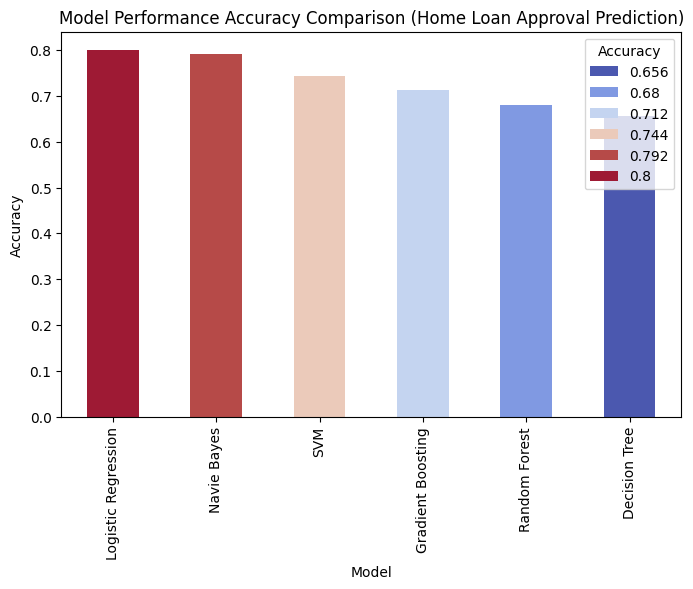

In [ ]:
plt.figure(figsize=(8, 5))
All_Model_Score = All_Model_Score.sort_values(by='Accuracy', ascending=False)
sns.barplot(x=All_Model_Score['Model'],y=All_Model_Score['Accuracy'],hue=All_Model_Score['Accuracy'],palette='coolwarm',width=0.5)
plt.title("Model Performance Accuracy Comparison (Home Loan Approval Prediction)")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.show()

Logistic Regression  AUC :0.75 
Decision Tree  AUC :0.64 
Random Forest  AUC :0.68 
SVM  AUC :0.72 
Gradient Boosting  AUC :0.70 
Naive Bayes  AUC :0.70 


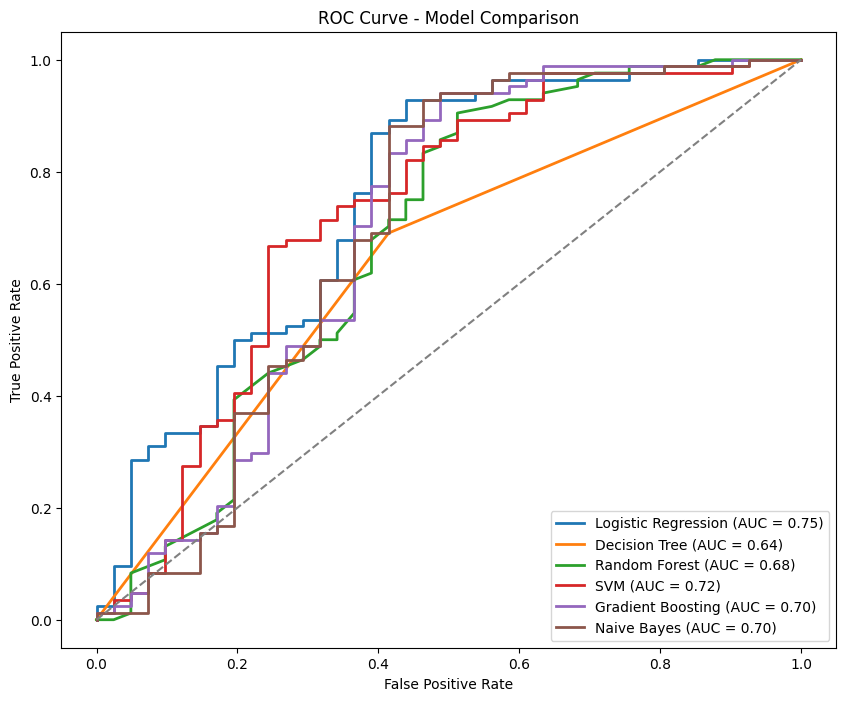

In [ ]:
# Plot ROC curves for each model
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 8))
models = {
    "Logistic Regression": LR_pred_prob,
    "Decision Tree": DT_pred_prob,
    "Random Forest": RT_pred_prob,
    "SVM": SVC_pred_prob,
    "Gradient Boosting": GB_pred_prob,
    "Naive Bayes": NB_pred_prob
}
for model_name, pred_prob in models.items():
    fpr, tpr, _ = roc_curve(y_test, pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    print(f"{model_name}  AUC :{roc_auc:.2f} ")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend(loc="lower right")
plt.show()

## My Observations : 6 Model Performance Comparison

* **Best Accuracy:** Naive Bayes (0.80), followed closely by Logistic Regression (0.792).
* **Best Precision** for Class 1: Logistic Regression (0.80), followed closely by Naive Bayes (0.79).
* **Best Recall** for Class 1: Naive Bayes (0.96), followed by Logistic Regression (0.92).
* **Best F1-Score** for Class 1: Naive Bayes (0.87), followed by Logistic Regression (0.86).

###Conclusion
* NaiveBayes(NB) and LogisticRegression performed the best overall, with high accuracy, recall, and F1-score.
* SVM also performed well, with good accuracy and a balance between precision and recall.
* Decision Tree and Random Forest had lower accuracy (0.65) and performed worse than other models.
* Gradient Boosting was moderate, but not as strong as Naive Bayes or Logistic Regression.

## **Home Loan Approval Prediction using Unsupervised Learning**

* Now i want to try unsupervised learning, need to group similar applicants based on features. In this approach, I apply K-Means Clustering to group similar loan applicants based on shared characteristics. This helps identify hidden patterns and enables better decision-making in loan approvals.

* **Main reasons to Use K-Means for Home Loan Approval Prediction :**

  1. **Identifies Hidden Patterns** :  K-Means clusters loan applicants based on Total Income, Credit History, Loan Amount, Marital Status, Education, and Loan Term, revealing natural groupings in the data. This helps banks understand similarities among applicants without predefined labels.

  2. **Customer Segmentation** : By grouping applicants into Low-Risk, Medium-Risk, and High-Risk categories, banks can tailor lending strategies, set interest rates, and offer personalized loan options. This improves risk management and enhances decision-making in loan approvals.


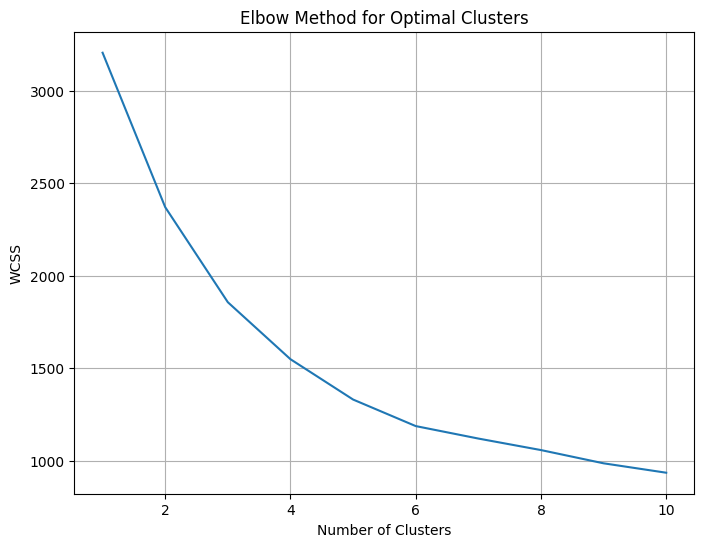

In [ ]:
# K- Means Clustering
from sklearn.cluster import KMeans
# Find the optimal number (k) of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(Loan_cleaned)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.grid(True)
plt.ylabel('WCSS')
plt.show()

**My observation :**
* After analyzing the visual, the elbow point appears to be at 4 clusters. This suggests that the optimal number of clusters for this dataset is 4, as the within-cluster sum of squares (WCSS).

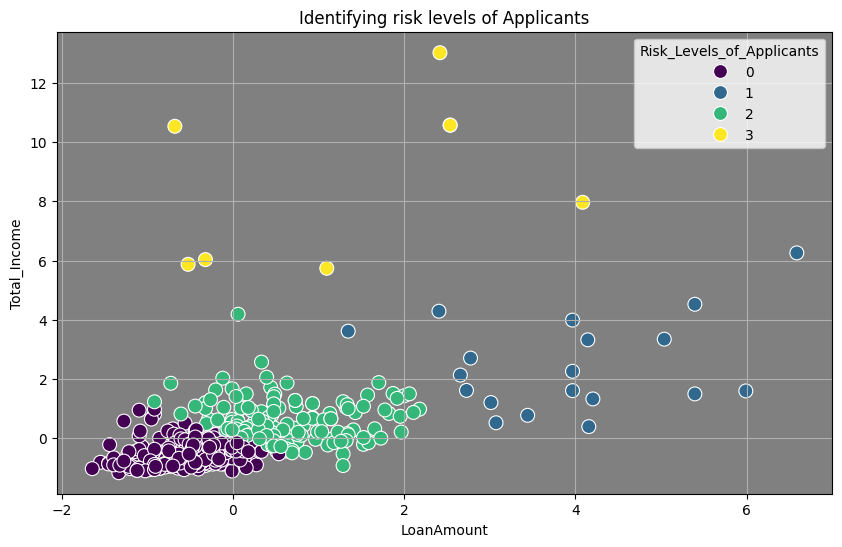

Identifying risk levels of Applicants


,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Risk_Levels_of_Applicants
271,1,1,-0.130387,0.276582,1.0,2,1,0.271765,2
433,1,1,-0.047033,0.276582,1.0,1,1,-0.209321,0
51,0,1,-0.320910,0.276582,1.0,1,1,-0.916121,0
341,0,1,-1.202080,0.276582,1.0,0,0,-1.020466,0
397,1,1,-0.618603,0.276582,1.0,2,1,-0.422499,0
322,1,0,-0.009357,0.276582,1.0,0,1,-0.293764,0
445,1,1,-0.201833,0.276582,1.0,0,1,-0.444260,0
186,1,1,-0.963926,-0.657816,0.0,0,0,-1.049942,0
27,1,0,-0.439987,0.276582,1.0,2,1,-0.390677,0
228,1,1,0.131583,2.145378,1.0,1,1,-0.669701,0


In [ ]:
from sklearn.datasets import make_blobs
# already find k value= 4
# Extract relevant columns
X = Loan_cleaned[['Total_Income', 'LoanAmount']]
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=700, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)
# Add the clusters to the Loan dataset
Loan_cleaned['Risk_Levels_of_Applicants'] = clusters
plt.figure(figsize=(10, 6))
c = sns.scatterplot(data=Loan_cleaned, x='LoanAmount', y='Total_Income', hue='Risk_Levels_of_Applicants', palette='viridis', s=100)
c.set_facecolor('grey')
plt.title('Identifying risk levels of Applicants')
plt.xlabel('LoanAmount')
plt.ylabel('Total_Income')
plt.grid(True)
plt.legend(title='Risk_Levels_of_Applicants', loc='upper right')
plt.show()
print("Identifying risk levels of Applicants")
Loan_cleaned.sample(10)

**My observation:**

this Scatter plot clearly shows the financial risk clusters based on the loan amount and total income. The color-coding makes it easy to identify different clusters:
*   **Purple (Cluster 0): Low risk** : Applicants with high credit history, high income, and low loan amounts. They are the safest for loan approval.
*   **Blue (Cluster 1): Medium risk** : Applicants with good credit history, moderate income, and moderate loan amounts. They are moderately safe.
*   **Green (Cluster 2): High risk** : Applicants with low credit history, low income, and high loan amounts. They pose a higher risk.
*   **Yellow (Cluster 3): Very high risk** : Applicants with poor credit history, low income, and high loan amounts. They are the riskiest for loan approval.

This visualization effectively highlights the various risk levels, helping you make informed decisions about loan approvals.

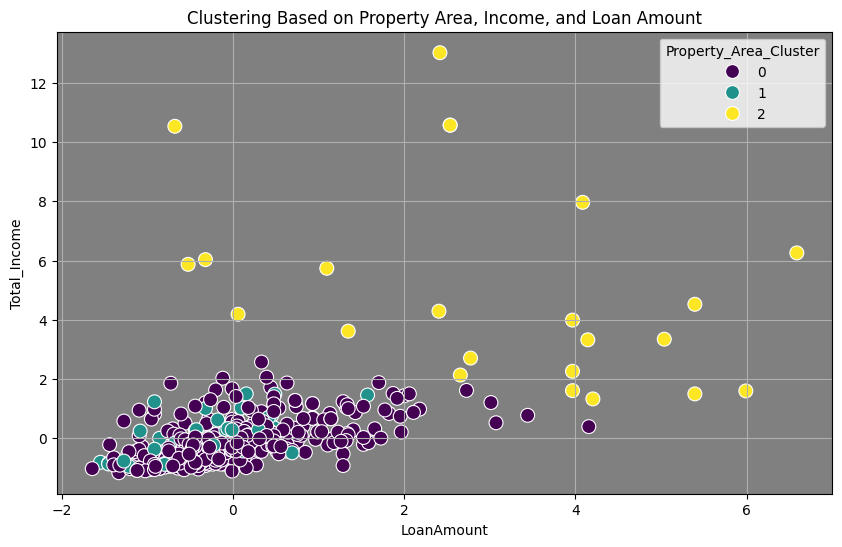

Clustering Based on Property Area, Income, and Loan Amount


,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Risk_Levels_of_Applicants,Property_Area_Cluster
287,1,1,-0.320910,0.276582,1.0,0,1,-0.137674,0,0
578,1,1,-0.475710,0.276582,1.0,0,1,-0.341205,0,0
557,1,1,1.346169,0.276582,1.0,1,1,0.123353,2,0
509,0,1,-1.273526,0.276582,1.0,2,1,0.583622,0,0
449,0,0,0.512629,0.276582,1.0,1,0,-0.432881,0,0
183,1,1,1.346169,0.276582,1.0,1,0,3.617299,1,2
474,0,1,0.179214,0.276582,1.0,0,1,1.041810,2,0
465,0,1,-0.082756,0.276582,1.0,0,1,-0.486654,0,0
546,0,0,-0.797218,-4.769169,1.0,1,0,-0.876033,0,1
148,0,1,0.929399,0.276582,1.0,0,0,0.675443,2,0


In [ ]:
from sklearn.datasets import make_blobs
# Extract relevant columns for clustering
X = Loan_cleaned[['Property_Area', 'Total_Income', 'LoanAmount','Loan_Status','Loan_Amount_Term',	'Credit_History']]
# Apply KMeans clustering with K=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=700, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)
Loan_cleaned['Property_Area_Cluster'] = clusters
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=Loan_cleaned, x='LoanAmount', y='Total_Income', hue='Property_Area_Cluster', palette='viridis', s=100)
ax.set_facecolor('grey')
plt.title('Clustering Based on Property Area, Income, and Loan Amount')
plt.xlabel('LoanAmount')
plt.ylabel('Total_Income')
plt.grid(True)
plt.legend(title='Property_Area_Cluster', loc='best' )
plt.show()
print("Clustering Based on Property Area, Income, and Loan Amount")
Loan_cleaned.sample(10)

**My observation:**

**Clustering Based on Property Area, Income, and Loan Amount**
* **Purple (Cluster 0: Urban High Earners):** Applicants in urban areas with high total income and typically high education. These applicants are **low risk** for loan approval.

* **Teal (Cluster 1: Rural or Semiurban, Mid-Income)**: Applicants in rural or semiurban areas with moderate income and varied education levels. These applicants are at a **moderate risk** for loan approval.

* **Yellow (Cluster 2: Low-Income Applicants):** Applicants in any property area with low income and high loan amounts. These applicants are **high risk** for loan approval.

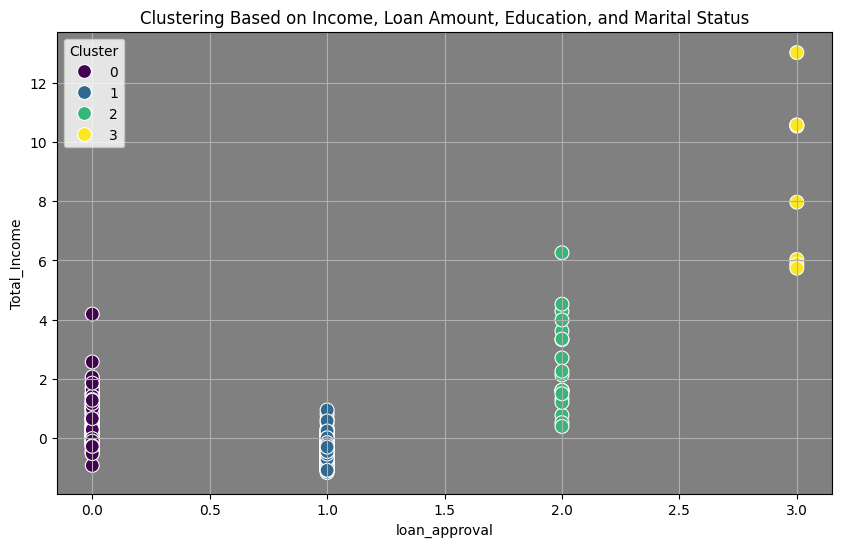

In [ ]:
X = Loan_cleaned[['Married',	'Education','LoanAmount','Total_Income']]
# Apply KMeans clustering with K=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=700, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)
Loan_cleaned['loan_approval_Cluster'] = clusters
# Calculate loan approval probability for each cluster (assuming 'Loan_Status' is binary: 1 for approved, 0 for rejected)
approval_prob = Loan_cleaned.groupby('loan_approval_Cluster')['Loan_Status'].mean()
# Visualize loan approval probability
plt.figure(figsize=(10, 6))
c = sns.scatterplot(data=Loan_cleaned, y='Total_Income', x='loan_approval_Cluster', hue='loan_approval_Cluster', palette='viridis', s=100)
c.set_facecolor('grey')  # Set the background color
plt.title('Clustering Based on Income, Loan Amount, Education, and Marital Status')
plt.ylabel('Total_Income')
plt.xlabel('loan_approval')
plt.grid(True)
plt.legend(title='Cluster', loc='best')
plt.show()

**My observation :**

**Clustering Based on Income, Loan Amount, Education, and Marital Status**
* **Purple (Cluster 0):** Lower risk applicants with high income and lower loan amounts.

* **Teal (Cluster 1):** Medium risk applicants with moderate income and loan amounts.

* **Green (Cluster 2):** Higher risk applicants with varied education and marital status, moderate income, and higher loan amounts.

* **Yellow (Cluster 3):** Highest risk applicants with lower income and higher loan amounts.